In [2]:
from pathlib import Path, PurePath
import matplotlib.pyplot as plt
from typing import *
import numpy as np
import subprocess

In [11]:
def myplot(title: str, names: List[str]):

    root = Path("/data/natsuki/dataset_atmaCup11/checkpoints")
    plt.rcParams["figure.dpi"] = 100
    plt.grid()
    plt.title(title)
    niter = 10
    results = dict()
    for name in names:
        each_epoch_RMSE = list()
        for epoch in range(1, niter+1):
            each_fold_RMSE = list()
            for fold in range(3):
                try:
                    RMSE_fold = float((root/f"{name}_3fold{fold}"/f"epoch{epoch}_3fold{fold}_test_RMSE.csv").read_text())
                except:
                    print(name, epoch, fold)
                    RMSE_fold = np.nan
                each_fold_RMSE.append(RMSE_fold)
            RMSE_epoch = np.mean(each_fold_RMSE)
            each_epoch_RMSE.append(RMSE_epoch)
        plt.plot(each_epoch_RMSE, label=name, marker="o")
    plt.legend()


atma11simple_xavier_b64 6 0
atma11simple_xavier_b64 6 1
atma11simple_xavier_b64 6 2
atma11simple_xavier_b64 7 0
atma11simple_xavier_b64 7 1
atma11simple_xavier_b64 7 2
atma11simple_xavier_b64 8 0
atma11simple_xavier_b64 8 1
atma11simple_xavier_b64 8 2
atma11simple_xavier_b64 9 0
atma11simple_xavier_b64 9 1
atma11simple_xavier_b64 9 2
atma11simple_xavier_b64 10 0
atma11simple_xavier_b64 10 1
atma11simple_xavier_b64 10 2
atma11simple_xavier_b128 6 0
atma11simple_xavier_b128 6 1
atma11simple_xavier_b128 6 2
atma11simple_xavier_b128 7 0
atma11simple_xavier_b128 7 1
atma11simple_xavier_b128 7 2
atma11simple_xavier_b128 8 0
atma11simple_xavier_b128 8 1
atma11simple_xavier_b128 8 2
atma11simple_xavier_b128 9 0
atma11simple_xavier_b128 9 1
atma11simple_xavier_b128 9 2
atma11simple_xavier_b128 10 0
atma11simple_xavier_b128 10 1
atma11simple_xavier_b128 10 2
atma11simple_xavier_b256 6 0
atma11simple_xavier_b256 6 1
atma11simple_xavier_b256 6 2
atma11simple_xavier_b256 7 0
atma11simple_xavier_b25

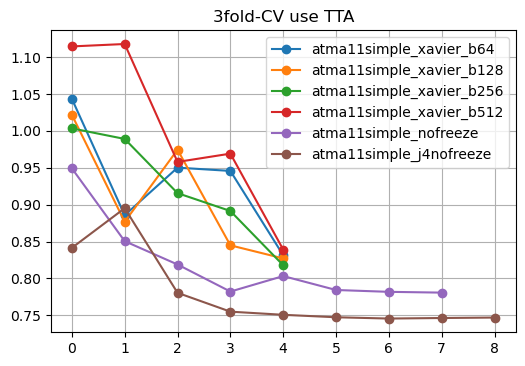

In [12]:
myplot(
    "3fold-CV use TTA",
    ["atma11simple_xavier_b64", "atma11simple_xavier_b128","atma11simple_xavier_b256","atma11simple_xavier_b512", "atma11simple_nofreeze", "atma11simple_j4nofreeze"]
)

In [5]:
Path("/data/natsuki/dataset_atmaCup11/checkpoints/atma11simple_xavier_b64_3fold0/epoch1_3fold0_test_RMSE.csv").read_text()

'1.1280055172230448\n'